# Hacking Food & Nutrition : Team Harvey Wiley

## Topic: Effects of Uganda's Nutrional Action Plan

## Goals: 

- Examine the efficacy of the Uganda's Nutrition Action Plan (2011 - 2016) using the data provided for Uganda.
    - Did the NAP make a difference in HH ability to meet nutritional needs?  How big of a difference?
- Evaluate what kinds of policies might be effective at improving nutritional outcomes for particular populations. 
- Future steps: what future plans will benefit Uganda? Target popiulation? Cost?

## Background - Uganda Nutrition Action Plan (UNAP)

The Uganda Nutrition Action Plan (UNAP) is a multi-sectoral strategy developed by the Government of Uganda to address and improve the nutrition status of its population. The first UNAP was implemented from 2011 to 2016, and its main goal was to reduce malnutrition, particularly among vulnerable groups such as pregnant and lactating women, infants, and young children

### UNAP point out a very important concept for young children
During the period from conception to their second birthday is characterised as the 1,000 days of opportunity to effectively and sustainably address malnutrition. Interventions to prevent malnutrition have the greatest benefit during these 1,000 days. Interventions after the second birthday can make a difference but often cannot undo the damage done by malnutrition during the first 1,000 days.

Based on our Household Characteristics data, we can not recognize mother, so we will try to find out children who are under age 2. In our data, our target population will focus on children with M 00-03 and F 00-03 to see their nutrition condition. This is done in [(A) Construct Nutrient System](#nutrient).

## Table of Contents: 
* [(A) Choice of a dataset](#population)
* [(A) Estimate Demand System](#demand)
* [(A) Construct Nutrient System](#nutrient)

### Setup

In [1]:
!pip install -r requirements.txt
import numpy as np
import pandas as pd
from eep153_tools.sheets import read_sheets
import cfe

Missing dependencies for OracleDemands.


In [2]:
# Import whole Google Sheet
Uganda_Dataog = '1yVLriVpo7KGUXvR3hq_n53XpXlD5NmLaH1oOMZyV0gQ'
Uganda_Data = "1mo_bNlLJ-M6yQDDdUxvDnvBc-Hs2nZcEuxJ59CCYgWA" #See Note

#Note: Uganda_Data created solely for creating consumption tables using more detailed labels, link available below
# https://docs.google.com/spreadsheets/d/1mo_bNlLJ-M6yQDDdUxvDnvBc-Hs2nZcEuxJ59CCYgWA/edit#gid=1174957327

# Meanwhile there are some wrong data type from Uganda so we drop 15-31 household with errors. 
# Compare with our huge data base, it should not be big influence to our result
import warnings
warnings.filterwarnings("ignore")

## (A) Choice of a dataset (and data setup for consumption) <a class="anchor" id="population"></a>

In [3]:
# Importing expenditure in different years

Expenditure_2009 = read_sheets(Uganda_Data,sheet = 'Expenditures (2009-2010)')
Expenditure_2013 = read_sheets(Uganda_Data,sheet = 'Expenditures (2013-2014)')
Expenditure_2019 = read_sheets(Uganda_Data,sheet = 'Expenditures (2019-2020)')

# Input price table
Price =  read_sheets(Uganda_Data,sheet = 'Prices')

# Replace the 'na' valyes w/ '0'
Expenditure_2009 = Expenditure_2009.replace(np.nan,0)
Expenditure_2013 = Expenditure_2013.replace(np.nan,0)
Expenditure_2019 = Expenditure_2019.replace(np.nan,0)
Price = Price.replace(np.nan,0)

Key available for students@eep153.iam.gserviceaccount.com.
Key available for students@eep153.iam.gserviceaccount.com.
Key available for students@eep153.iam.gserviceaccount.com.
Key available for students@eep153.iam.gserviceaccount.com.


In [4]:
# Create Food List 
food_list = ['Beans','Beef','Beer','Biscuits','Bongo','Bread',
             'Butter','Cabbages','Cake','Cassava','Cassava (flour)',
             'Chapati','Cheese','Chicken','Cigarettes','Coffee','Cooking Oil',
             'Cornflakes','Dodo','Donut','Eggs','Fish (dried)','Fish (fresh)',
             'Garlic','Ghee','Ginger','Goat','Ground Nuts','Honey','Ice Cream',
             'Infant Formula','Irish Potatoes','Jackfruit','Jam/Marmalade',
             'Kabalagala','Macaroni/Spaghetti','Maize','Mangos','Matoke','Milk (fresh)',
             'Milk (powdered)','Millet','Onions','Oranges','Other Alcohol','Other Drinks',
             'Other Fruits','Other Juice','Other Meat','Other Spices','Other Tobacco','Other Veg.',
             'Passion Fruits','Peas','Plantains','Pork','Rice','Salt','Samosa','Sim Sim','Soda',
             'Sorghum','Soybean','Sugar','Sugarcane','Sweet Bananas','Sweet Potatoes','Tea','Tomatoes',
             'Waragi','Water','Wheat (flour)','Yam','Yogurt']

In [5]:
#Filtering price data

# Filter price data for 2011-12
Price_data_2009 = Price[Price['t'] == '2009-10']
#Price_data_2009

# Filter price data for 2013-14
Price_data_2013 = Price[Price['t'] == '2013-14']
#Price_data_2013

# Filter price data for 2015-16
Price_data_2019 = Price[Price['t'] == '2019-20']
#Price_data_2019

In [6]:
#Merge price & expenditure data

#Price_data_2009 Expenditure_2009
merged_data_2009 = pd.merge(Expenditure_2009,Price_data_2009, on=['t', 'Market'], suffixes=('_expenditure', '_price'))
#merged_data_2011

#Price_data_2013 Expenditure_2013
merged_data_2013 = pd.merge(Expenditure_2013,Price_data_2013, on=['t', 'Market'], suffixes=('_expenditure', '_price'))
#merged_data_2013

#Price_data_2019 Expenditure_2019
merged_data_2019 = pd.merge(Expenditure_2019,Price_data_2019, on=['t', 'Market'], suffixes=('_expenditure', '_price'))
#merged_data_2019

In [7]:
#Consumption Tables 

food_columns = food_list
for food in food_columns:
    merged_data_2009[food + '_consumption'] = merged_data_2009[food + '_expenditure'] / merged_data_2009[food + '_price']

# replace na to 0
merged_data_2009 = merged_data_2009.replace(np.nan,0)

# keep ID, t, Market
columns_to_keep = ['ID', 't', 'Market']

# add consumption columns to the list
for food in food_columns:
    columns_to_keep.append(food + '_consumption')

# create a new dataframe with only the selected columns
consumption_data_2009 = merged_data_2009[columns_to_keep]
print("2009-10 Consumption")
consumption_data_2009

2009-10 Consumption


,ID,t,Market,Beans_consumption,Beef_consumption,Beer_consumption,Biscuits_consumption,Bongo_consumption,Bread_consumption,Butter_consumption,...,Sugarcane_consumption,Sweet Bananas_consumption,Sweet Potatoes_consumption,Tea_consumption,Tomatoes_consumption,Waragi_consumption,Water_consumption,Wheat (flour)_consumption,Yam_consumption,Yogurt_consumption
0,1013000201,2009-10,Central,0.0,0.0,0.0,0.0,0.0,1.041667,0.0,...,0.0,0.00,3.000000,0.0000,1.666667,0.0,0.0,0.0,0.0,0.0
1,1013000204,2009-10,Central,0.0,0.0,0.0,0.0,0.0,0.625000,0.0,...,0.0,9.25,0.000000,0.0000,3.333333,0.0,0.0,0.0,0.0,0.0
2,1013000206,2009-10,Central,0.0,0.0,0.0,0.0,0.0,1.250000,0.0,...,0.0,9.25,0.000000,0.0625,0.000000,0.0,0.0,0.0,0.0,0.0
3,1013000210,2009-10,Central,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.00,0.000000,0.0000,0.000000,0.0,0.0,0.0,0.0,0.0
4,101300021302,2009-10,Central,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.00,2.000000,0.2500,1.666667,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2885,3213003007,2009-10,Northern,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.00,2.222222,0.0625,2.333333,0.0,0.0,0.0,0.0,0.0
2886,3213003008,2009-10,Northern,2.8,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.00,4.444444,0.1250,0.000000,0.0,0.0,0.0,0.0,0.0
2887,321300300802,2009-10,Northern,4.5,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.00,4.444444,0.0625,0.000000,0.0,0.0,0.0,0.0,0.0
2888,3213003009,2009-10,Northern,4.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.00,0.000000,0.1250,0.000000,0.0,0.0,0.0,0.0,0.0


In [8]:
food_columns = food_list
for food in food_columns:
    merged_data_2013[food + '_consumption'] = merged_data_2013[food + '_expenditure'] / merged_data_2013[food + '_price']

# replace na to 0
merged_data_2013 = merged_data_2013.replace(np.nan,0)

# keep ID, t, Market
columns_to_keep = ['ID', 't', 'Market']

# add consumption columns to the list
for food in food_columns:
    columns_to_keep.append(food + '_consumption')

# create a new dataframe with only the selected columns
consumption_data_2013 = merged_data_2013[columns_to_keep]
print("2013-14 Consumption")
consumption_data_2013

2013-14 Consumption


,ID,t,Market,Beans_consumption,Beef_consumption,Beer_consumption,Biscuits_consumption,Bongo_consumption,Bread_consumption,Butter_consumption,...,Sugarcane_consumption,Sweet Bananas_consumption,Sweet Potatoes_consumption,Tea_consumption,Tomatoes_consumption,Waragi_consumption,Water_consumption,Wheat (flour)_consumption,Yam_consumption,Yogurt_consumption
0,1013000201,2013-14,Central,0.75,0.000000,0.0,0.0,0.0,0.457143,0.0,...,0.0,0.00,8.079208,0.0000,2.240000,0.0,0.0,0.0,0.0,0.0
1,1013000202,2013-14,Central,2.50,0.000000,0.0,0.0,0.0,0.071429,0.0,...,0.0,0.00,4.847525,0.0225,1.440000,0.0,0.0,0.0,0.0,0.0
2,1013000204,2013-14,Central,1.20,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.00,4.039604,0.0300,2.240000,0.0,0.0,0.0,0.0,0.0
3,1021000108,2013-14,Central,3.20,0.875000,0.0,0.0,0.0,1.028571,0.0,...,0.0,0.00,1.615842,0.0750,3.200000,0.0,0.0,0.0,0.0,0.0
4,1021000109,2013-14,Central,1.50,1.125000,0.0,0.0,0.0,0.514286,0.0,...,0.0,0.00,1.615842,0.0300,3.200000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3077,H40605-04-01,2013-14,Northern,0.25,0.285714,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.00,0.778032,0.0150,2.133333,0.0,0.0,0.0,0.0,0.0
3078,H40607-04-01,2013-14,Northern,0.50,0.571429,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.00,0.000000,0.0000,1.866667,0.0,0.0,0.0,0.0,0.0
3079,H40608-04-01,2013-14,Northern,1.30,0.000000,0.0,0.0,0.0,1.750000,0.0,...,0.0,0.60,0.778032,0.0300,4.000000,0.0,0.0,0.0,0.0,0.0
3080,H40609-04-01,2013-14,Northern,0.50,0.571429,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.24,0.000000,0.0000,2.666667,0.0,0.0,0.0,0.0,0.0


In [9]:
food_columns = food_list
for food in food_columns:
    merged_data_2019[food + '_consumption'] = merged_data_2019[food + '_expenditure'] / merged_data_2019[food + '_price']

# replace na to 0
merged_data_2019 = merged_data_2019.replace(np.nan,0)

# keep ID, t, Market
columns_to_keep = ['ID', 't', 'Market']

# add consumption columns to the list
for food in food_columns:
    columns_to_keep.append(food + '_consumption')

# create a new dataframe with only the selected columns
consumption_data_2019 = merged_data_2019[columns_to_keep]
print("2019-20 Consumption")
consumption_data_2019

2019-20 Consumption


,ID,t,Market,Beans_consumption,Beef_consumption,Beer_consumption,Biscuits_consumption,Bongo_consumption,Bread_consumption,Butter_consumption,...,Sugarcane_consumption,Sweet Bananas_consumption,Sweet Potatoes_consumption,Tea_consumption,Tomatoes_consumption,Waragi_consumption,Water_consumption,Wheat (flour)_consumption,Yam_consumption,Yogurt_consumption
0,00c9353d8ebe42faabf5919b81d7fae7,2019-20,Eastern,1.582418,0.00,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,5.034965,0.020000,1.600000,0.0,0.0,0.0,0.865775,0.0
1,062da72d5d3a457e9336b62c8bb9096d,2019-20,Eastern,0.000000,0.00,0.0,0.0,0.0,0.111111,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0
2,0d0e29faff394154a69562b4527b48b8,2019-20,Eastern,0.439560,0.45,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.000000,1.280000,0.0,0.0,0.0,0.000000,0.0
3,0e03e253c35d4333a1ffad2df9d38850,2019-20,Eastern,1.230769,0.00,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,6.293706,0.020000,0.800000,0.0,0.0,0.0,0.000000,0.0
4,1083001603,2019-20,Eastern,2.637363,0.00,0.0,0.0,0.3,0.000000,0.0,...,0.0,0.0,0.000000,0.000000,0.800000,0.0,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3004,_62,2019-20,Western,0.818182,0.00,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,2.720000,0.000000,2.000000,0.0,0.0,0.0,0.000000,0.0
3005,_67,2019-20,Western,2.727273,0.00,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,2.720000,0.017143,0.000000,0.0,0.0,0.0,0.000000,0.0
3006,a98bebba177243668464e31f6d2bb92d,2019-20,Western,6.818182,2.00,0.0,0.0,0.0,1.000000,0.0,...,0.0,0.0,8.160000,0.128571,6.666667,0.0,1.5,0.0,0.000000,0.0
3007,acb16f9b068549d8a80a37c9d638742f,2019-20,Western,1.272727,0.00,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.000000,1.333333,0.0,0.0,0.0,0.000000,0.0


## (A) Estimate Demand System<a class="anchor" id="demand"></a>
Estimate a system of demands for different kinds of food. Characterize how consumption varies with household need.

In [10]:
x = read_sheets(Uganda_Dataog,sheet='Expenditures (2019-20)')
# Code above can be edited to change by year
x.columns.name = 'j'
                 
d = read_sheets(Uganda_Dataog,sheet="HH Characteristics")
d.columns.name = 'k'

# x may have duplicate columns
x = x.groupby('j',axis=1).sum()
x = x.replace(0,np.nan) # Replace zeros with missing

# Take logs of expenditures; call this y
y = np.log(x.set_index(['i','t','m']))

d.set_index(['i','t','m'],inplace=True)

Key available for students@eep153.iam.gserviceaccount.com.
Key available for students@eep153.iam.gserviceaccount.com.


In [11]:
from cfe.estimation import drop_columns_wo_covariance

y = drop_columns_wo_covariance(y,min_obs=30)

In [12]:
use = y.index.intersection(d.index)
y = y.loc[use,:]
d = d.loc[use,:]

y = y.stack()

d = d.stack()

# Check that indices are in right places!
assert y.index.names == ['i','t','m','j']
assert d.index.names == ['i','t','m','k']

In [13]:
from cfe import Regression

result = Regression(y=y,d=d)

In [14]:
result.predicted_expenditures()

i                                 t        m         j             
00c9353d8ebe42faabf5919b81d7fae7  2019-20  Eastern   Beans             3555.677276
                                                     Beef              8401.789558
                                                     Biscuits           842.091521
                                                     Bread             3077.266434
                                                     Cabbages          1199.255865
                                                                          ...     
e07bc322c4884559b4b8ca75c945dd3e  2019-20  Northern  Sweet Potatoes    6706.688800
                                                     Tea                201.911345
                                                     Tomatoes          1349.788766
                                                     Waragi            4423.328381
                                                     Yam               2839.871449
Length: 101010, dty

<IPython.core.display.Javascript object>


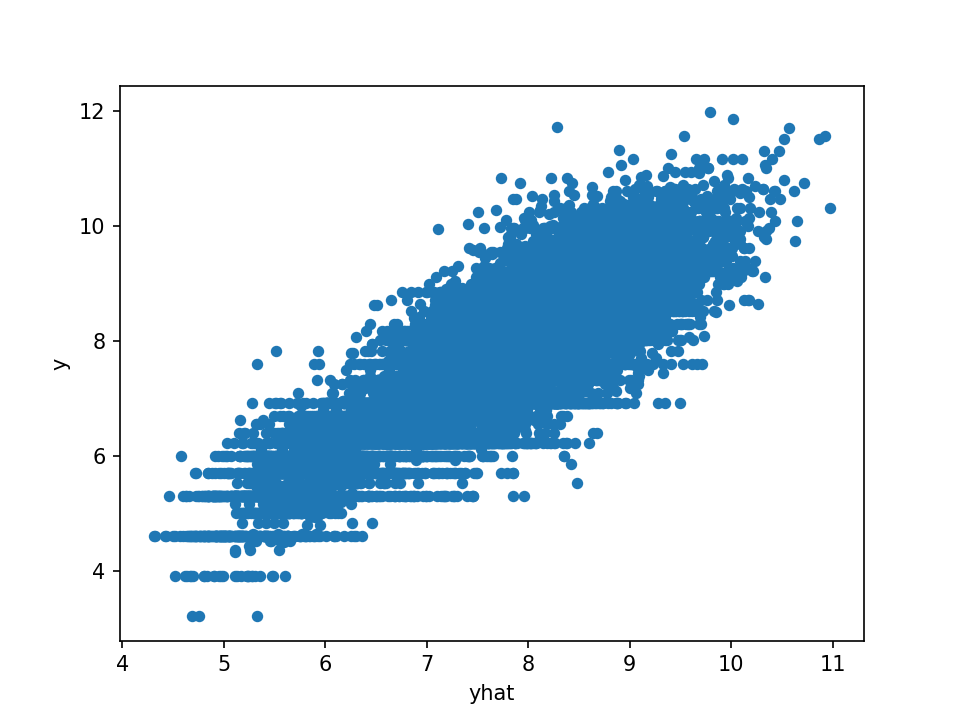

<AxesSubplot:xlabel='yhat', ylabel='y'>

In [72]:
%matplotlib notebook
df = pd.DataFrame({'y':y,'yhat':result.get_predicted_log_expenditures()})
df.plot.scatter(x='yhat',y='y')

In [16]:
result.get_beta().sort_values()

j
Cassava           0.089645
Salt              0.104366
Millet            0.163091
Peas              0.221420
Beans             0.229586
Dodo              0.231391
Waragi            0.234374
Onions            0.234774
Sweet Potatoes    0.248343
Eggs              0.259851
Matoke            0.270251
Fish (dried)      0.283041
Cabbages          0.286388
Tea               0.295146
Beef              0.298503
Maize             0.299072
Cooking Oil       0.299955
Pork              0.301544
Ground Nuts       0.311495
Tomatoes          0.330459
Yam               0.353646
Rice              0.356148
Mangos            0.366501
Kabalagala        0.392616
Sim Sim           0.398601
Other Veg.        0.407817
Sweet Bananas     0.433388
Soda              0.453436
Chapati           0.456309
Bread             0.465375
Oranges           0.484020
Other Fruits      0.491350
Milk (fresh)      0.542295
Biscuits          0.571134
Fish (fresh)      0.603296
Name: beta, dtype: float64

<IPython.core.display.Javascript object>


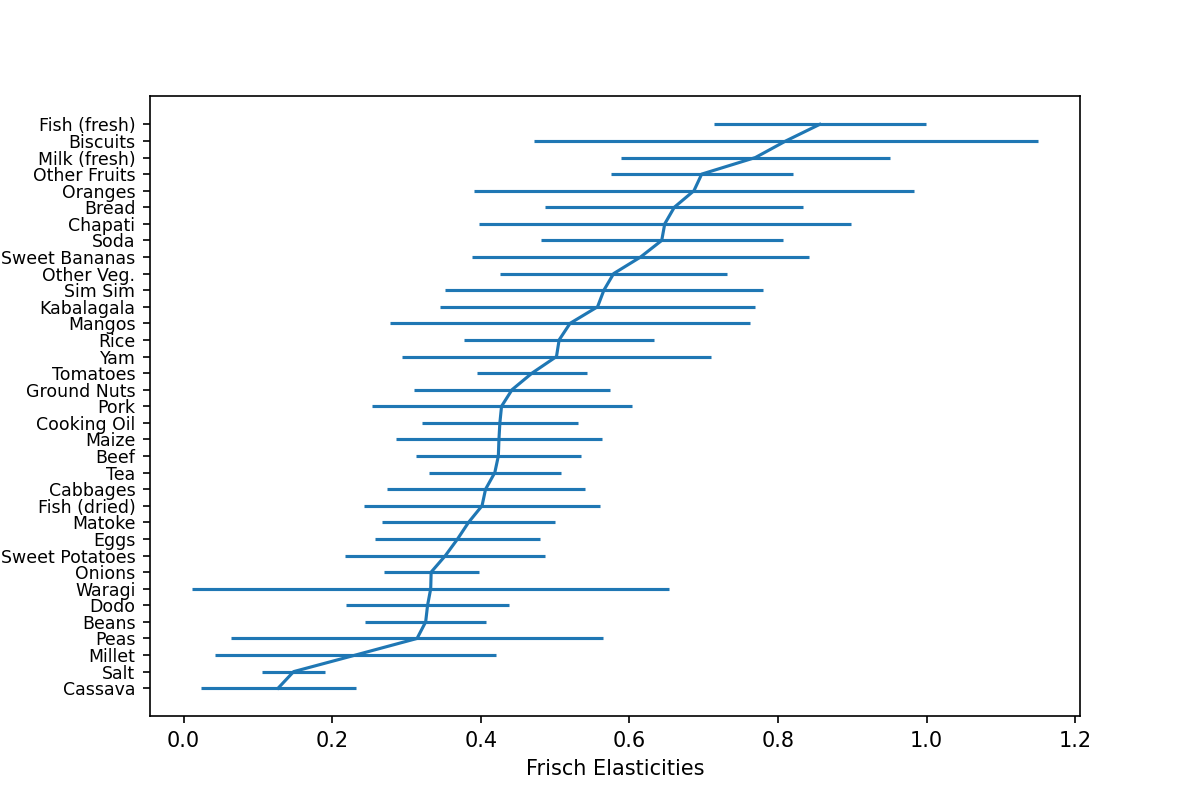

<IPython.core.display.Javascript object>


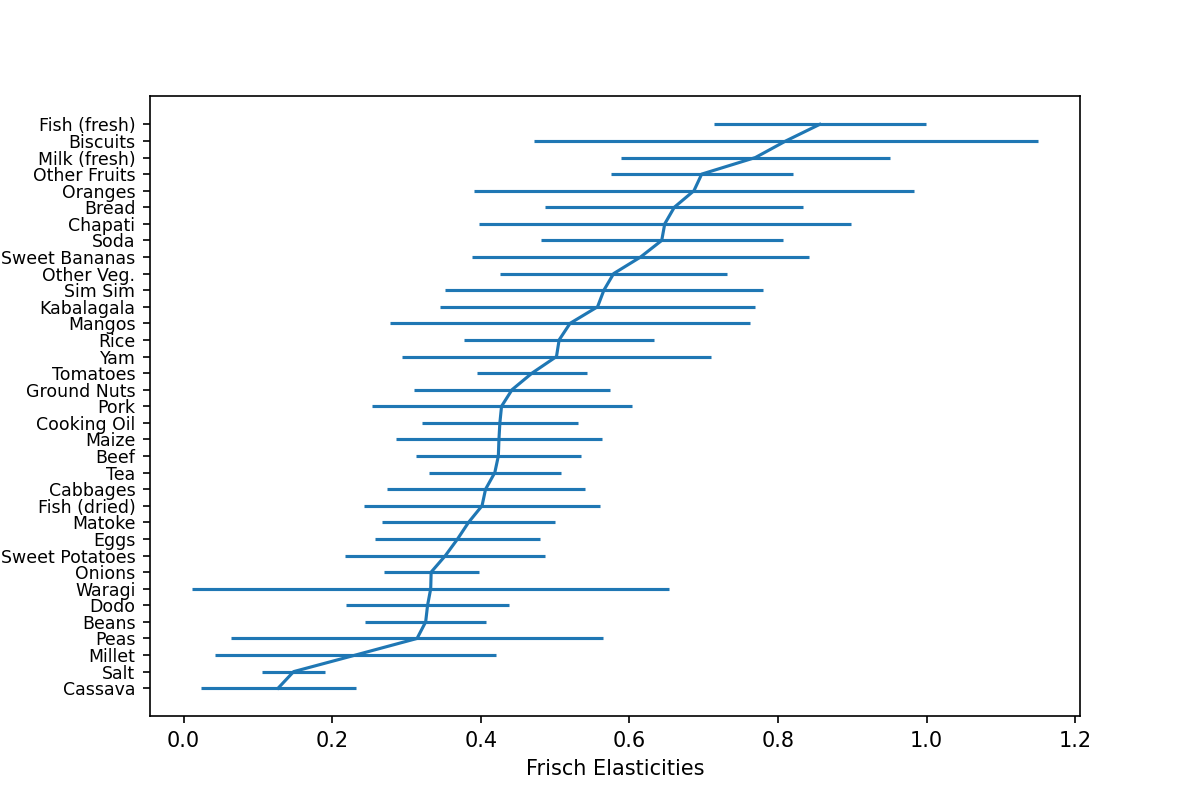

In [73]:
result.graph_beta()

In [18]:
result.gamma

k,F 00-03,F 04-08,F 09-13,F 14-18,F 19-30,F 31-50,F 51+,M 00-03,M 04-08,M 09-13,M 14-18,M 19-30,M 31-50,M 51+,log HSize,Constant
j,,,,,,,,,,,,,,,,
Beans,-0.124336,0.035231,0.090377,0.004499,-0.007870,0.022907,0.102685,-0.042510,0.022145,0.064256,0.063150,0.041227,0.011180,0.114473,0.391925,-0.765806
Beef,-0.133073,0.012580,0.015526,0.014861,0.082507,0.061304,0.189160,-0.042146,0.021119,-0.009366,0.048574,0.077610,0.170483,0.171712,0.252517,-0.676754
Biscuits,0.038606,-0.000608,-0.026963,0.101941,0.015177,0.244867,0.289385,0.243284,0.039812,-0.050499,-0.058406,0.046866,0.170904,-0.127918,-0.075380,-0.409758
Bread,-0.064686,0.027238,-0.092955,-0.008487,0.061894,0.057456,0.084374,-0.128560,0.073478,-0.041311,-0.019199,0.013019,0.074366,0.078168,0.398146,-0.751295
Cabbages,0.007378,-0.058572,0.029930,0.037955,-0.026252,0.036936,0.081504,-0.045031,0.033217,0.013162,0.042502,0.069609,0.030480,0.068790,0.232485,-0.513702
Cassava,0.019206,0.089485,0.105922,0.042049,-0.004145,0.072680,0.156273,-0.003705,0.134056,0.186236,0.135270,0.062836,0.098303,0.118365,0.148453,-0.711646
Chapati,-0.034054,-0.008517,0.065749,0.090993,0.023017,0.006971,-0.090070,0.007639,0.082807,-0.036377,-0.016584,0.067900,0.093947,0.153264,0.162986,-0.412577
Cooking Oil,-0.088741,-0.050446,-0.052850,0.011923,0.028813,0.017072,-0.079372,-0.086822,-0.083002,-0.041623,-0.007363,-0.034479,0.005265,0.052592,0.418256,-0.517449
Dodo,-0.083900,-0.011246,0.091461,0.040517,0.049264,0.073878,0.182246,-0.021156,0.021386,0.088145,-0.009156,0.044575,0.063169,0.162541,0.170590,-0.539539


In [19]:
result.to_pickle('my_estimates.pickle')

## (A) Construct Nutrient System <a class="anchor" id="nutrient"></a>

### Input data and filter data for our target population <a class="anchor" id="population"></a>

In [20]:
COUNTRY = 'Uganda'
URL = {'Uganda':'https://docs.google.com/spreadsheets/d/1yVLriVpo7KGUXvR3hq_n53XpXlD5NmLaH1oOMZyV0gQ/'}
DAYS_PER_PERIOD = {'Uganda':7} # Number of days of expenditure 

#Lines below AND next code cell may be excluded if not filtering out households 
# Filter for HH_Characteristics with F 00-03 and M 00-03
HH_Characteristics = read_sheets(URL[COUNTRY],sheet='HH Characteristics')
HH_Characteristics_0003 = HH_Characteristics[(HH_Characteristics['F 00-03'] != 0)|(HH_Characteristics ['M 00-03'] != 0)] 
HH_Characteristics_0003

Key available for students@eep153.iam.gserviceaccount.com.


,i,t,m,F 00-03,F 04-08,F 09-13,F 14-18,F 19-30,F 31-50,F 51+,M 00-03,M 04-08,M 09-13,M 14-18,M 19-30,M 31-50,M 51+,log HSize
0,00c9353d8ebe42faabf5919b81d7fae7,2018-19,,1.0,0.0,1.0,3.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.079442
1,00c9353d8ebe42faabf5919b81d7fae7,2019-20,Eastern,1.0,0.0,0.0,3.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.945910
7,0d0e29faff394154a69562b4527b48b8,2018-19,,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.386294
8,0d0e29faff394154a69562b4527b48b8,2019-20,Eastern,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.386294
10,0e03e253c35d4333a1ffad2df9d38850,2019-20,Eastern,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.609438
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24355,d3b025db3a9d4a4ea1e217532fd9299a,2018-19,,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.945910
24356,e07bc322c4884559b4b8ca75c945dd3e,2018-19,,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,1.945910
24357,e07bc322c4884559b4b8ca75c945dd3e,2019-20,Northern,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.945910
24359,edfcce99d80241cd8a7b5f7f169dc0a0,2018-19,,1.0,1.0,2.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.079442


## 2009 Target Population with M 00-03 and F 00-03

In [21]:
HH_Characteristics_0003_2009 = HH_Characteristics_0003[(HH_Characteristics_0003['t'] == '2009-10')]

# Input year below, here 2009 was used
Expenditure_2009 = read_sheets(URL[COUNTRY],sheet='Expenditures (2009-10)')
Expenditure_2009 

# fix the data issue with i column
HH_Characteristics_0003_2009['i'] = pd.to_numeric(HH_Characteristics_0003_2009['i'], errors='coerce')
Expenditure_2009['i'] = pd.to_numeric(Expenditure_2009['i'], errors='coerce')
HH_Characteristics_0003_2009 = HH_Characteristics_0003_2009.dropna(subset=['i'])
Expenditure_2009 = Expenditure_2009.dropna(subset=['i'])

# convert the 'i' column to same type both DataFrames
HH_Characteristics_0003_2009['i'] = HH_Characteristics_0003_2009['i'].astype('int64')
Expenditure_2009['i'] = Expenditure_2009['i'].astype('int64')

# merge two dataframe
filtered_expenditures = pd.merge(HH_Characteristics_0003_2009[['i', 't']], Expenditure_2009, on=['i', 't'], how='inner')
filtered_expenditures

Key available for students@eep153.iam.gserviceaccount.com.


,i,t,m,Beans,Beef,Beer,Biscuits,Bongo,Bread,"Butter, etc.",...,Sugarcane,Sweet Bananas,Sweet Potatoes,Tea,Tomatoes,Waragi,Water,Wheat (flour),Yam,Yogurt
0,1013000204,2009-10,Central,NaN,NaN,NaN,NaN,NaN,1500.0,NaN,...,NaN,1000.0,NaN,NaN,1000.0,NaN,NaN,NaN,NaN,NaN
1,1021000102,2009-10,Central,NaN,17500.0,NaN,NaN,NaN,17500.0,3500.0,...,NaN,NaN,NaN,NaN,1000.0,NaN,NaN,NaN,NaN,NaN
2,1021000109,2009-10,Central,1300.0,10000.0,NaN,NaN,NaN,4400.0,500.0,...,NaN,NaN,2000.0,100.0,4000.0,NaN,NaN,NaN,NaN,NaN
3,1021000203,2009-10,Central,11200.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,12000.0,500.0,3500.0,NaN,NaN,NaN,NaN,NaN
4,102100020304,2009-10,Central,2000.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2500.0,50.0,1000.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1522,4193003206,2009-10,Western,6200.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,500.0,2000.0,500.0,NaN,NaN,NaN,NaN,NaN,NaN
1523,4193003502,2009-10,Western,2100.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,500.0,NaN,NaN,NaN,NaN,NaN,NaN
1524,4193003503,2009-10,Western,7200.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,200.0,900.0,NaN,NaN,NaN,NaN,NaN
1525,4193003506,2009-10,Western,16800.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,500.0,NaN,NaN,NaN,NaN,NaN,NaN


##### ps. Because of the data type error, we lost some data so the household change from 1558 to 1527.
###### In the 'i' column, there are some index include words that it can not transfer to numeric.

In [22]:
# Get (filtered) Uganda data 
x = filtered_expenditures
# Or may use code below if not filtering and enter year wanted
# x = read_sheets(URL[COUNTRY],sheet='Expenditures (2009-10)')

if len(x.columns==5): # stored as a series
    x = x.set_index(['i','t','m']).squeeze()
x.columns.name = 'j'
x = x.stack().dropna()
x.index.names = ['i','t','m','j']

# changed some columns' name to fit in

y = np.log(x)

z = read_sheets(URL[COUNTRY],sheet='HH Characteristics').set_index(['i','t','m'])
z.columns.name = 'k'
z.index.names=['i','t','m']

p = read_sheets(URL[COUNTRY],sheet='Prices').set_index(['t','m'])
p.columns.name = 'j'

Key available for students@eep153.iam.gserviceaccount.com.
Key available for students@eep153.iam.gserviceaccount.com.


In [23]:
# clear the data type
y.index = y.index.set_levels(y.index.levels[0].astype(str), level=0)
y.index = y.index.set_levels(y.index.levels[1].astype(str), level=1)

z.index = z.index.set_levels(z.index.levels[0].astype(str), level=0)
z.index = z.index.set_levels(z.index.levels[1].astype(str), level=1)

r = cfe.Regression(y=y,d=z)

In [24]:
xhat = r.predicted_expenditures()

In [25]:
r.to_pickle("my %s.pickle" % COUNTRY)

### 2009 Plot food demand for specific food <a class="anchor" id="population"></a>

In [26]:
# These are prices per kilogram:
my_t = '2009-10'  # Choose from periods available in your dataset!

pbar = p.xs(my_t,level='t').mean()
pbar = pbar[r.beta.index] # Only use prices for goods we can estimate

my_j = 'Beans'  # Choose a reference good for analysis; should satisfy

assert my_j in pbar.index, f"The label {my_j} does not match a good for which demands have been estimated."

In [27]:
xhat = r.predicted_expenditures()

# Total food expenditures per household
xbar = xhat.groupby(['i','t','m']).sum()

# Reference budget
x0 = xbar.quantile(0.5)  # Household at 0.5 quantile is median

f"Median income is {x0} in local currency."

'Median income is 76539.86432027748 in local currency.'

In [28]:
#pbar = pbar.fillna(600)

def my_prices(p0,p=pbar,j=my_j):
    """
    Change price of jth good to p0, holding other prices fixed.
    """
    p = p.copy()
    p.loc[j] = p0
    return p

Text(0.5, 1.0, '2009 Uganda data')

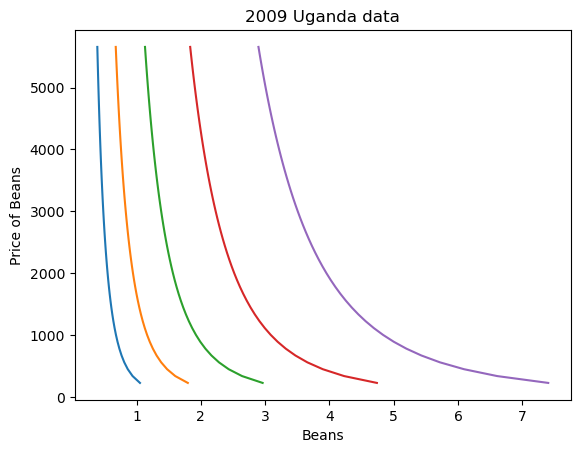

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline

# Values for prices
ref_price = pbar[my_j]
P = np.linspace(ref_price/5,ref_price*5,50)

for x in [x0*s for s in [.25,.5,1.,2,4]]:
    plt.plot([r.demands(x,my_prices(p0))[my_j] for p0 in P],P)

plt.xlabel(my_j)
plt.ylabel(f'Price of {my_j}')
plt.title('2009 Uganda data')

### 2009 Plotting nutrient demands <a class="anchor" id="population"></a>

In [30]:
import warnings 

# Get FCT:
fct = read_sheets(URL[COUNTRY],
                  sheet='FCT').set_index('j')
fct.columns.name='n'


def nutrient_demand(x,p):
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        c = r.demands(x,p)

    fct0,c0 = fct.align(c,axis=0,join='inner')
    N = fct0.T@c0

    N = N.loc[~N.index.duplicated()]
    
    return N

Key available for students@eep153.iam.gserviceaccount.com.


Text(0, 0.5, 'log nutrient')

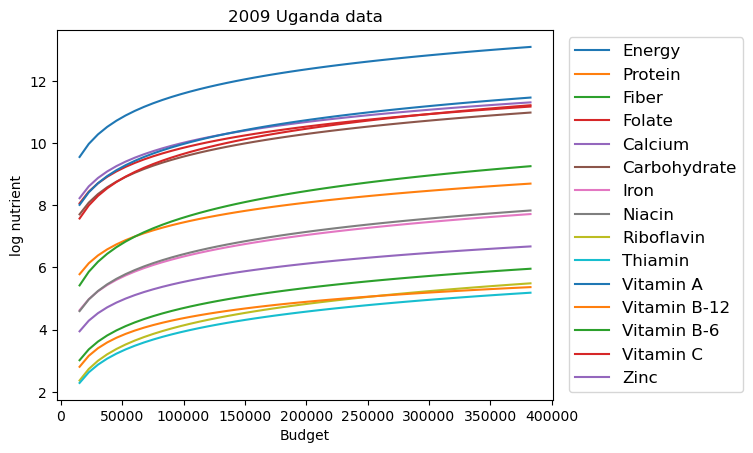

In [31]:
X = np.linspace(x0/5,x0*5,50)

# UseNutrients = ['Protein','Calories','Iron','Calcium']
UseNutrients = fct.columns.tolist()

plt.plot(X,[np.log(nutrient_demand(x,pbar))[UseNutrients] for x in X])
plt.legend(UseNutrients,bbox_to_anchor=(1.4 ,0.5),fontsize='large',loc='right')
plt.title('2009 Uganda data')
plt.xlabel('Budget')
plt.ylabel('log nutrient')

### 2009 RDI Nutrient requirement <a class="anchor" id="population"></a>

In [32]:
rdi = read_sheets(URL[COUNTRY],
                  sheet='RDI').set_index('n').replace(np.nan,0)
rdi.columns.name = 'k'

rdi = rdi.replace('',0)
rdi

Key available for students@eep153.iam.gserviceaccount.com.


k,F 00-03,M 00-03,F 04-08,M 04-08,F 09-13,M 09-13,F 14-18,M 14-18,F 19-30,M 19-30,F 31-50,M 31-50,F 51+,M 51+
n,,,,,,,,,,,,,,
Energy,1000.0,1000.0,1200.0,1400.0,1600.0,1800.0,1800.0,2200.0,2000.0,2400.0,1800.0,2200.0,1600.0,2000.0
Protein,13.0,13.0,19.0,19.0,34.0,34.0,46.0,52.0,46.0,56.0,46.0,56.0,46.0,56.0
Fiber,14.0,14.0,16.8,19.6,22.4,25.2,25.2,30.8,28.0,33.6,25.2,30.8,22.4,28.0
Folate,150.0,150.0,200.0,200.0,300.0,300.0,400.0,400.0,400.0,400.0,400.0,400.0,400.0,400.0
Calcium,700.0,700.0,1000.0,1000.0,1300.0,1300.0,1300.0,1300.0,1000.0,1000.0,1000.0,1000.0,1200.0,1000.0
Carbohydrate,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0
Iron,7.0,7.0,10.0,10.0,8.0,8.0,15.0,11.0,18.0,8.0,18.0,8.0,8.0,8.0
Magnesium,80.0,80.0,130.0,130.0,240.0,240.0,360.0,410.0,310.0,400.0,320.0,420.0,320.0,420.0
Niacin,6.0,6.0,8.0,8.0,12.0,12.0,14.0,16.0,14.0,16.0,14.0,16.0,14.0,16.0


In [33]:
# Find average household characteristics for reference period & place
zbar = r.d.mean()

In [34]:
# This matrix product gives minimum nutrient requirements for average household in reference year & place
my_rdi,my_zbar = rdi.align(zbar.T,axis=1,join='inner')
hh_rdi = my_rdi@my_zbar.T

# But this is per *day*, while our data is per period:
hh_rdi = hh_rdi*DAYS_PER_PERIOD[COUNTRY]
print("2009-10 minimum nutrient requirements")
hh_rdi

2009-10 minimum nutrient requirements


n
Energy           81673.252688
Protein           1721.313172
Fiber             1143.425538
Folate           14825.369624
Calcium          50830.443548
Carbohydrate      6437.271505
Iron               515.944220
Magnesium        12255.739247
Niacin             568.345430
Phosphorus       37952.795699
Potassium       206642.069892
Riboflavin          44.531384
Thiamin             43.451277
Vitamin A        29497.379032
Vitamin B-12        88.952218
Vitamin B-6         48.424664
Vitamin C         2545.920699
Vitamin E          553.296371
Vitamin K         3484.405242
Zinc               356.153226
dtype: float64

### 2009 Nutritional Adequacy <a class="anchor" id="population"></a>

In [35]:
def nutrient_adequacy_ratio(x,p):
    return (nutrient_demand(x,p)/hh_rdi.T).squeeze()

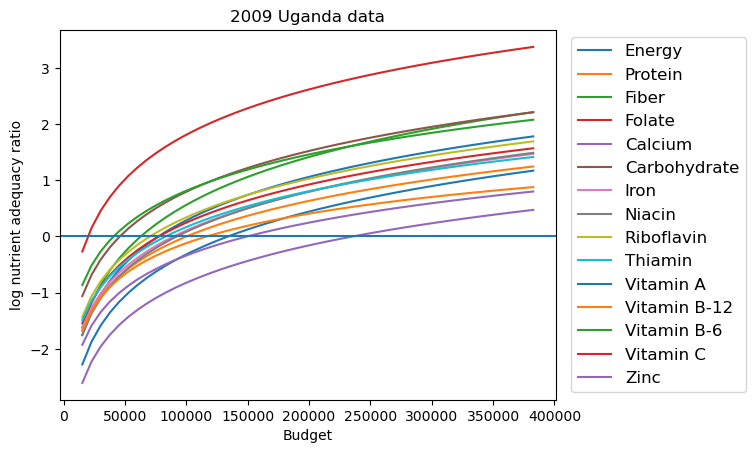

In [36]:
plt.plot(X,[np.log(nutrient_adequacy_ratio(x,pbar))[UseNutrients] for x in X])
plt.legend(UseNutrients,bbox_to_anchor=(1.4 ,0.5),fontsize='large',loc='right')
plt.title('2009 Uganda data')
plt.xlabel('Budget')
plt.ylabel('log nutrient adequacy ratio')
plt.axhline(0)

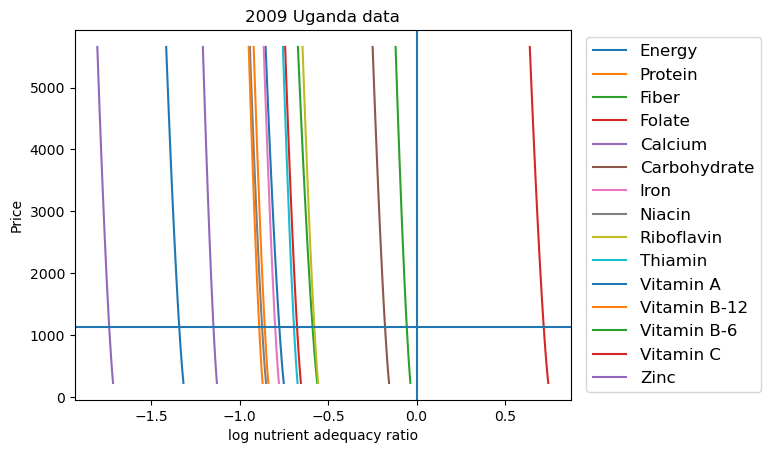

In [37]:
poorer_x = x0/2

plt.plot([np.log(nutrient_adequacy_ratio(poorer_x,my_prices(p0,j=my_j)))[UseNutrients] for p0 in P],P)
plt.legend(UseNutrients,bbox_to_anchor=(1.4 ,0.5),fontsize='large',loc='right')
plt.title('2009 Uganda data')
plt.ylabel('Price')
plt.xlabel('log nutrient adequacy ratio')
plt.axvline(0)
plt.axhline(pbar[my_j])

## 2013 Target Population with M 00-03 and F 00-03

In [38]:
HH_Characteristics_0003_2013 = HH_Characteristics_0003[(HH_Characteristics_0003['t'] == '2013-14')]

In [39]:
# Input year below, here 2013 was used
Expenditure_2013 = read_sheets(URL[COUNTRY],sheet='Expenditures (2013-14)')
Expenditure_2013 

# fix the data issue with i column
HH_Characteristics_0003_2013['i'] = HH_Characteristics_0003_2013['i'].astype('object')
Expenditure_2013['i'] = Expenditure_2013['i'].astype('object')

# merge two dataframe
filtered_expenditures = pd.merge(HH_Characteristics_0003_2013[['i', 't']], Expenditure_2013, on=['i', 't'], how='inner')
filtered_expenditures

Key available for students@eep153.iam.gserviceaccount.com.


,i,t,m,Beans,Beef,Beer,Biscuits,Bongo,Bread,"Butter, etc.",...,Sugarcane,Sweet Bananas,Sweet Potatoes,Tea,Tomatoes,Waragi,Water,Wheat (flour),Yam,Yogurt
0,1013000202,2013-14,Central,5000.0,NaN,NaN,NaN,NaN,250.0,NaN,...,NaN,NaN,6000.0,150.0,900.0,NaN,NaN,NaN,NaN,NaN
1,1013000204,2013-14,Central,2400.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,5000.0,200.0,1400.0,NaN,NaN,NaN,NaN,NaN
2,1021000201,2013-14,Central,4000.0,8000.0,NaN,NaN,NaN,7000.0,NaN,...,NaN,NaN,NaN,100.0,1000.0,NaN,NaN,NaN,NaN,NaN
3,1021000701,2013-14,Central,2000.0,8000.0,6000.0,NaN,NaN,3000.0,900.0,...,NaN,4000.0,NaN,200.0,1000.0,NaN,NaN,NaN,NaN,NaN
4,1021000703,2013-14,Central,12000.0,8000.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,200.0,1500.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1500,H43006-04-01,2013-14,Western,20000.0,NaN,NaN,NaN,NaN,NaN,1200.0,...,NaN,NaN,6000.0,400.0,1000.0,NaN,NaN,NaN,NaN,NaN
1501,H43007-04-01,2013-14,Western,1800.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,100.0,500.0,NaN,NaN,NaN,NaN,NaN
1502,H43008-04-01,2013-14,Western,3000.0,4000.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2000.0,100.0,500.0,NaN,NaN,NaN,NaN,NaN
1503,H43009-04-01,2013-14,Western,10800.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2000.0,NaN,NaN,NaN,NaN,NaN


##### ps. Because of the data type error, we lost some data so the household change from 1520 to 1505.
###### In the 'i' column, there are some index include words that it can not transfer to numeric.

### 2013 Estimation demand system

In [40]:
# get Uganda data 
x = filtered_expenditures

if len(x.columns==5): # stored as a series
    x = x.set_index(['i','t','m']).squeeze()
x.columns.name = 'j'
x = x.stack().dropna()
x.index.names = ['i','t','m','j']

# I changed some columns' name to fit in

y = np.log(x)

z = read_sheets(URL[COUNTRY],sheet='HH Characteristics').set_index(['i','t','m'])
z.columns.name = 'k'
z.index.names=['i','t','m']

p = read_sheets(URL[COUNTRY],sheet='Prices').set_index(['t','m'])
p.columns.name = 'j'

Key available for students@eep153.iam.gserviceaccount.com.
Key available for students@eep153.iam.gserviceaccount.com.


In [41]:
# clear the data type
y.index = y.index.set_levels(y.index.levels[0].astype(str), level=0)
y.index = y.index.set_levels(y.index.levels[1].astype(str), level=1)

z.index = z.index.set_levels(z.index.levels[0].astype(str), level=0)
z.index = z.index.set_levels(z.index.levels[1].astype(str), level=1)

r = cfe.Regression(y=y,d=z)

In [42]:
xhat = r.predicted_expenditures()

In [43]:
r.to_pickle("my %s.pickle" % COUNTRY)

### 2013 Plot food demand for certain food

In [44]:
# These are prices per kilogram:
my_t =  '2013-14'

pbar = p.xs(my_t,level='t').mean()
pbar = pbar[r.beta.index] # Only use prices for goods we can estimate

my_j = 'Beans'  # Choose a reference good for analysis; should satisfy

assert my_j in pbar.index, f"The label {my_j} does not match a good for which demands have been estimated."

In [45]:
xhat = r.predicted_expenditures()

# Total food expenditures per household
xbar = xhat.groupby(['i','t','m']).sum()

# Reference budget
x0 = xbar.quantile(0.5)  # Household at 0.5 quantile is median

f"Median income is {x0} in local currency."

'Median income is 120811.88770334849 in local currency.'

In [46]:
def my_prices(p0,p=pbar,j=my_j):
    """
    Change price of jth good to p0, holding other prices fixed.
    """
    p = p.copy()
    p.loc[j] = p0
    return p

Text(0.5, 1.0, '2013 Uganda data')

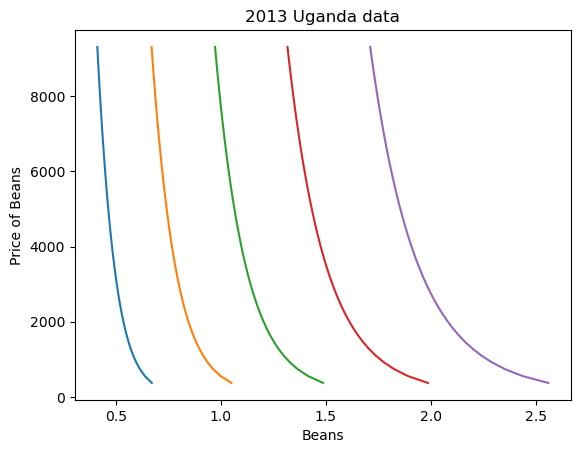

In [47]:
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

# Values for prices
ref_price = pbar[my_j]
P = np.linspace(ref_price/5,ref_price*5,50)

for x in [x0*s for s in [.25,.5,1.,2,4]]:
    plt.plot([r.demands(x,my_prices(p0))[my_j] for p0 in P],P)

plt.xlabel(my_j)
plt.ylabel(f'Price of {my_j}')
plt.title('2013 Uganda data')

### 2013 Plotting Nutrient Demands

In [48]:
from eep153_tools.sheets import read_sheets
import warnings 

# Get FCT:
fct = read_sheets(URL[COUNTRY],
                  sheet='FCT').set_index('j')
fct.columns.name='n'


def nutrient_demand(x,p):
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        c = r.demands(x,p)

    fct0,c0 = fct.align(c,axis=0,join='inner')
    N = fct0.T@c0

    N = N.loc[~N.index.duplicated()]
    
    return N

Key available for students@eep153.iam.gserviceaccount.com.


Text(0, 0.5, 'log nutrient')

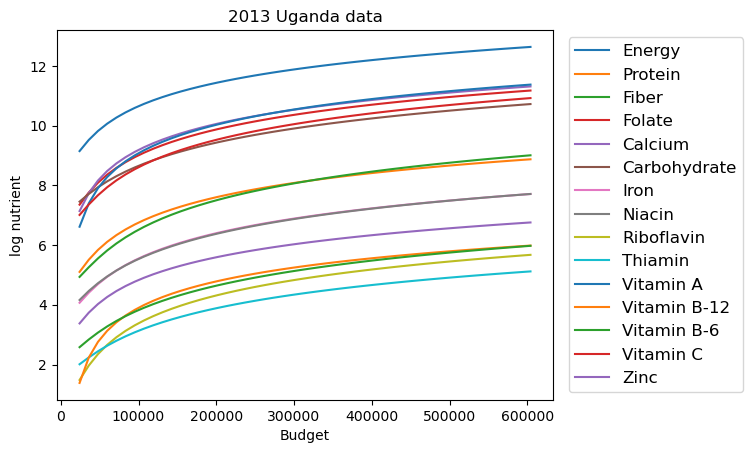

In [49]:
X = np.linspace(x0/5,x0*5,50)

# UseNutrients = ['Protein','Calories','Iron','Calcium']
UseNutrients = fct.columns.tolist()

plt.plot(X,[np.log(nutrient_demand(x,pbar))[UseNutrients] for x in X])
plt.legend(UseNutrients,bbox_to_anchor=(1.4 ,0.5),fontsize='large',loc='right')
plt.title('2013 Uganda data')
plt.xlabel('Budget')
plt.ylabel('log nutrient')

### 2013 RDI Nutrition requirement

In [50]:
# Find average household characteristics for reference period & place
zbar = r.d.mean()

In [51]:
# This matrix product gives minimum nutrient requirements for average household in reference year & place
my_rdi,my_zbar = rdi.align(zbar.T,axis=1,join='inner')
hh_rdi = my_rdi@my_zbar.T

# But this is per *day*, while our data is per period:
hh_rdi = hh_rdi*DAYS_PER_PERIOD[COUNTRY]
print("2013-14 minimum nutrient requirements")
hh_rdi

2013-14 minimum nutrient requirements


n
Energy           76752.433173
Protein           1620.296093
Fiber             1074.534064
Folate           13940.986977
Calcium          47429.198081
Carbohydrate      6042.549692
Iron               487.217272
Magnesium        11527.210418
Niacin             533.842358
Phosphorus       35152.570254
Potassium       193829.472241
Riboflavin          41.871899
Thiamin             40.841330
Vitamin A        27722.686772
Vitamin B-12        83.645922
Vitamin B-6         45.544140
Vitamin C         2404.013023
Vitamin E          520.514051
Vitamin K         3290.623715
Zinc               333.970528
dtype: float64

### 2013 Nutritional Adequacy

In [52]:
def nutrient_adequacy_ratio(x,p):
    return (nutrient_demand(x,p)/hh_rdi.T).squeeze()

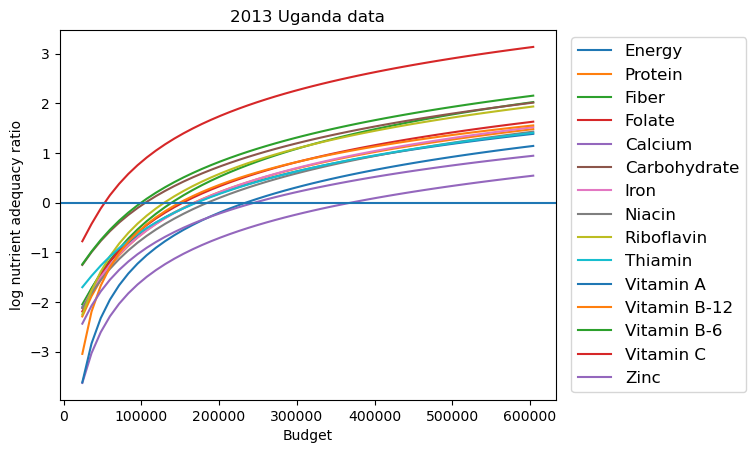

In [53]:
plt.plot(X,[np.log(nutrient_adequacy_ratio(x,pbar))[UseNutrients] for x in X])
plt.legend(UseNutrients,bbox_to_anchor=(1.4 ,0.5),fontsize='large',loc='right')
plt.title('2013 Uganda data')
plt.xlabel('Budget')
plt.ylabel('log nutrient adequacy ratio')
plt.axhline(0)

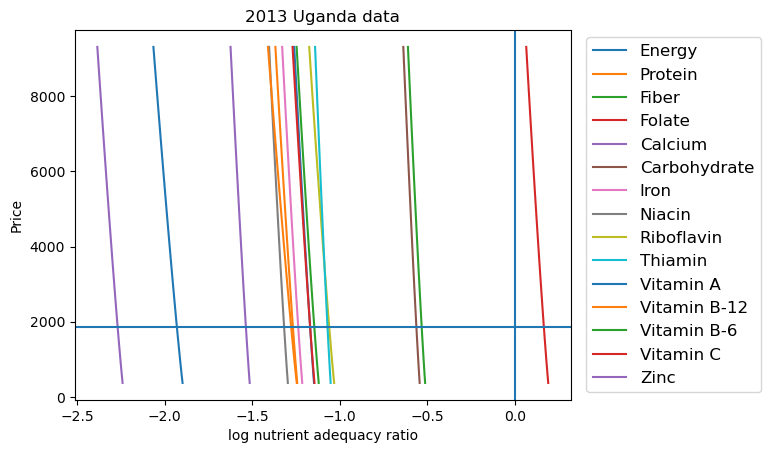

In [54]:
poorer_x = x0/2

plt.plot([np.log(nutrient_adequacy_ratio(poorer_x,my_prices(p0,j=my_j)))[UseNutrients] for p0 in P],P)
plt.legend(UseNutrients,bbox_to_anchor=(1.4 ,0.5),fontsize='large',loc='right')
plt.title('2013 Uganda data')
plt.ylabel('Price')
plt.xlabel('log nutrient adequacy ratio')
plt.axvline(0)
plt.axhline(pbar[my_j])

## 2019 Target Population with M 00-03 and F 00-03

In [55]:
HH_Characteristics_0003_2019 = HH_Characteristics_0003[(HH_Characteristics_0003['t'] == '2019-20')]

In [56]:
# Input year below, here 2019 was used
Expenditure_2019 = read_sheets(URL[COUNTRY],sheet='Expenditures (2019-20)')
Expenditure_2019 

# Fix the data issue with i column, prepare to merge
HH_Characteristics_0003_2019['i'] = HH_Characteristics_0003_2019['i'].astype('str')
Expenditure_2019['i'] = Expenditure_2019['i'].astype('str')

# Merge two dataframe
filtered_expenditures = pd.merge(HH_Characteristics_0003_2019[['i', 't']], Expenditure_2019, on=['i', 't'], how='inner')

Key available for students@eep153.iam.gserviceaccount.com.


##### ps. Because of the data type error, we lost some data so the household change from 1269 to 1251.
###### In the 'i' column, there are some index include words that it can not transfer to numeric.

### 2019 Estimation demand system

In [57]:
# get Uganda data 
x = filtered_expenditures

if len(x.columns==5): # stored as a series
    x = x.set_index(['i','t','m']).squeeze()
x.columns.name = 'j'
x = x.stack().dropna()
x.index.names = ['i','t','m','j']

# I changed some columns' name to fit in

y = np.log(x)

z = read_sheets(URL[COUNTRY],sheet='HH Characteristics').set_index(['i','t','m'])
z.columns.name = 'k'
z.index.names=['i','t','m']

p = read_sheets(URL[COUNTRY],sheet='Prices').set_index(['t','m'])
p.columns.name = 'j'

Key available for students@eep153.iam.gserviceaccount.com.
Key available for students@eep153.iam.gserviceaccount.com.


In [58]:
# clear the data type
y.index = y.index.set_levels(y.index.levels[0].astype(str), level=0)
y.index = y.index.set_levels(y.index.levels[1].astype(str), level=1)

z.index = z.index.set_levels(z.index.levels[0].astype(str), level=0)
z.index = z.index.set_levels(z.index.levels[1].astype(str), level=1)

r = cfe.Regression(y=y,d=z)

In [59]:
xhat = r.predicted_expenditures()

In [60]:
r.to_pickle("my %s.pickle" % COUNTRY)

### 2019 Plot food demand for certain food

In [61]:
# These are prices per kilogram:
my_t = '2019-20'

pbar = p.xs(my_t,level='t').mean()
pbar = pbar[r.beta.index] # Only use prices for goods we can estimate

my_j = 'Beans'  # Choose a reference good for analysis; should satisfy

assert my_j in pbar.index, f"The label {my_j} does not match a good for which demands have been estimated."

In [62]:
xhat = r.predicted_expenditures()

# Total food expenditures per household
xbar = xhat.groupby(['i','t','m']).sum()

# Reference budget
x0 = xbar.quantile(0.5)  # Household at 0.5 quantile is median

f"Median income is {x0} in local currency."

'Median income is 115850.04832381503 in local currency.'

In [63]:
#pbar = pbar.fillna(600)

def my_prices(p0,p=pbar,j=my_j):
    """
    Change price of jth good to p0, holding other prices fixed.
    """
    p = p.copy()
    p.loc[j] = p0
    return p

Text(0.5, 1.0, '2019 Uganda data')

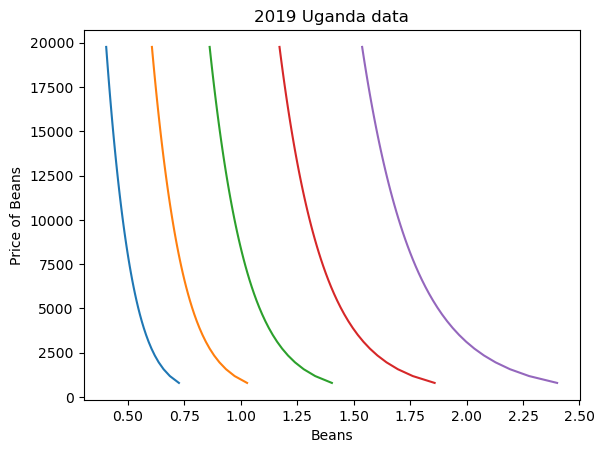

In [64]:
import matplotlib.pyplot as plt
%matplotlib inline

# Values for prices
ref_price = pbar[my_j]
P = np.linspace(ref_price/5,ref_price*5,50)

for x in [x0*s for s in [.25,.5,1.,2,4]]:
    plt.plot([r.demands(x,my_prices(p0))[my_j] for p0 in P],P)

plt.xlabel(my_j)
plt.ylabel(f'Price of {my_j}')
plt.title('2019 Uganda data')

### 2019 Plotting Nutrient Demands

In [65]:
from eep153_tools.sheets import read_sheets
import warnings 

# Get FCT:
fct = read_sheets(URL[COUNTRY],
                  sheet='FCT').set_index('j')
fct.columns.name='n'


def nutrient_demand(x,p):
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        c = r.demands(x,p)

    fct0,c0 = fct.align(c,axis=0,join='inner')
    N = fct0.T@c0

    N = N.loc[~N.index.duplicated()]
    
    return N

Key available for students@eep153.iam.gserviceaccount.com.


Text(0, 0.5, 'log nutrient')

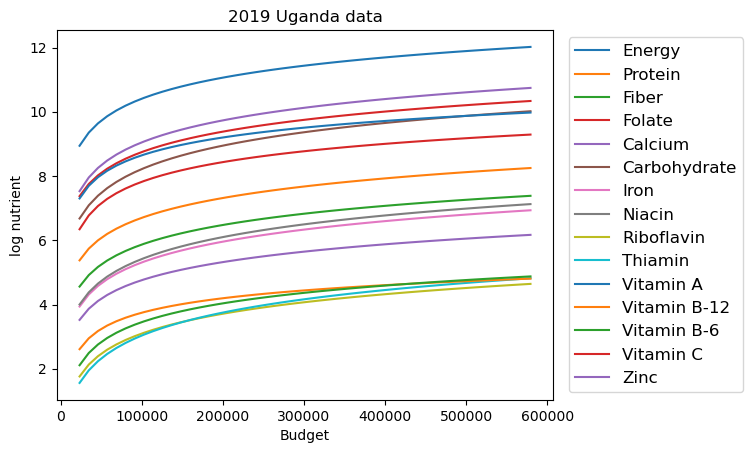

In [66]:
X = np.linspace(x0/5,x0*5,50)

# UseNutrients = ['Protein','Calories','Iron','Calcium']
UseNutrients = fct.columns.tolist()

plt.plot(X,[np.log(nutrient_demand(x,pbar))[UseNutrients] for x in X])
plt.legend(UseNutrients,bbox_to_anchor=(1.4 ,0.5),fontsize='large',loc='right')
plt.title('2019 Uganda data')
plt.xlabel('Budget')
plt.ylabel('log nutrient')

### 2019 RDI Nutrition requirement

In [67]:
# Find average household characteristics for reference period & place
zbar = r.d.mean()

In [68]:
# This matrix product gives minimum nutrient requirements for average household in reference year & place
my_rdi,my_zbar = rdi.align(zbar.T,axis=1,join='inner')
hh_rdi = my_rdi@my_zbar.T

# But this is per *day*, while our data is per period:
hh_rdi = hh_rdi*DAYS_PER_PERIOD[COUNTRY]
print("2019-2020 minimum nutrient requirements")
hh_rdi

2019-2020 minimum nutrient requirements


n
Energy           73845.172414
Protein           1571.439655
Fiber             1033.832414
Folate           13485.862069
Calcium          45617.672414
Carbohydrate      5807.525862
Iron               467.630172
Magnesium        11184.250000
Niacin             516.153448
Phosphorus       33818.267241
Potassium       186760.603448
Riboflavin          40.496207
Thiamin             39.488448
Vitamin A        26815.431034
Vitamin B-12        80.915172
Vitamin B-6         44.177241
Vitamin C         2336.823276
Vitamin E          503.643966
Vitamin K         3191.607759
Zinc               323.031897
dtype: float64

### 2019 Nutritional Adequacy

In [69]:
def nutrient_adequacy_ratio(x,p):
    return (nutrient_demand(x,p)/hh_rdi.T).squeeze()

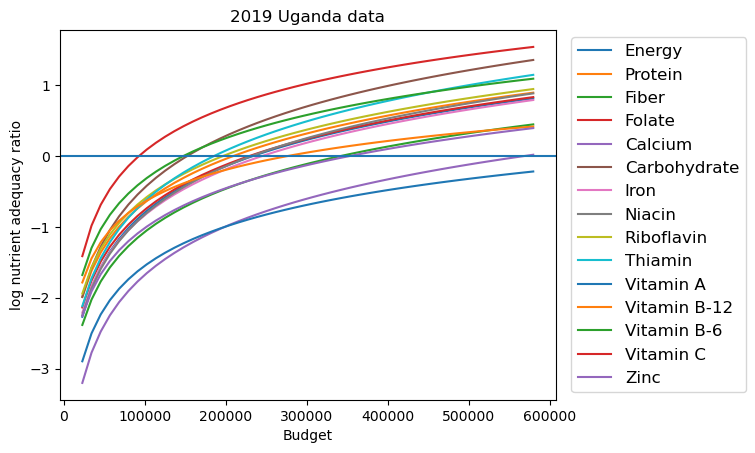

In [70]:
plt.plot(X,[np.log(nutrient_adequacy_ratio(x,pbar))[UseNutrients] for x in X])
plt.legend(UseNutrients,bbox_to_anchor=(1.4 ,0.5),fontsize='large',loc='right')
plt.title('2019 Uganda data')
plt.xlabel('Budget')
plt.ylabel('log nutrient adequacy ratio')
plt.axhline(0)

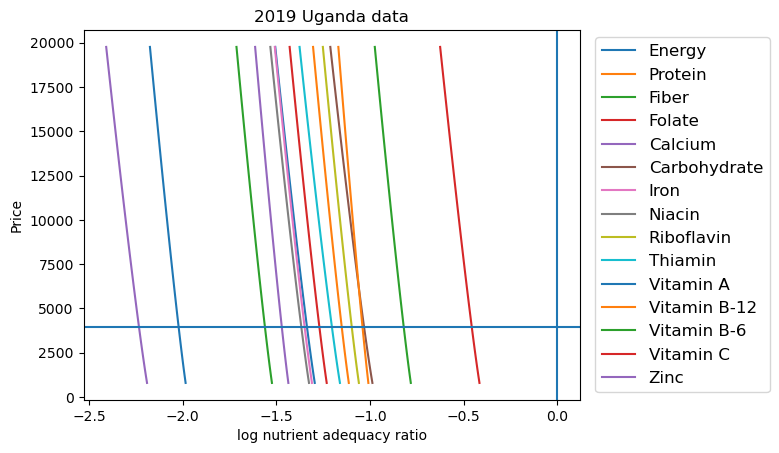

In [71]:
poorer_x = x0/2

plt.plot([np.log(nutrient_adequacy_ratio(poorer_x,my_prices(p0,j=my_j)))[UseNutrients] for p0 in P],P)
plt.legend(UseNutrients,bbox_to_anchor=(1.4 ,0.5),fontsize='large',loc='right')
plt.title('2019 Uganda data')
plt.ylabel('Price')
plt.xlabel('log nutrient adequacy ratio')
plt.axvline(0)
plt.axhline(pbar[my_j])